In [137]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import datetime as dt
import pylab as pl
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import statsmodels.formula.api as sm
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

#Import statsmodels package for training a linear regression model.
from patsy import dmatrices
import statsmodels.formula.api as sm
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

/Users/chenzeng/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#df = pd.read_csv('week3.csv')
#df.tail(5)

In [3]:

df = pd.read_csv('130114.csv')
df.set_index('LineID',inplace=True)
df.head()

/Users/chenzeng/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,DateTime,Direction,JourneyPatternID,TimeFrame,VehicleJourneyID,Opertator,Congestion,LonWGS84,LatWGS84,Delay,BlockID,VehicleID,StopID,AtStop
LineID,,,,,,,,,,,,,,,
66.0,0,2013-01-14 00:00:01,0,00660001,2013-01-13,14217,PO,0,-6.569710,53.380451,222,66006,40001,3968,0
40.0,1,2013-01-14 00:00:01,0,040D0001,2013-01-13,14403,HN,0,-6.373083,53.410049,338,40204,38067,6005,0
27.0,2,2013-01-14 00:00:01,0,077A1001,2013-01-13,14130,RD,0,-6.259118,53.345650,-534,27009,33254,1358,0
39.0,3,2013-01-14 00:00:01,0,039A0001,2013-01-13,14729,PO,0,-6.274983,53.350784,-125,39015,33557,7160,0
46.0,4,2013-01-14 00:00:01,0,046A0001,2013-01-13,16565,D1,0,-6.230600,53.317665,-988,46007,33532,2032,0


In [4]:
df.loc[41].to_csv('41.csv')
df_dt = pd.read_csv('41.csv')
df_dt.head()

,LineID,Unnamed: 0,DateTime,Direction,JourneyPatternID,TimeFrame,VehicleJourneyID,Opertator,Congestion,LonWGS84,LatWGS84,Delay,BlockID,VehicleID,StopID,AtStop
0,41.0,12,2013-01-14 00:00:01,0,041C1001,2013-01-13,13146,SL,0,-6.263903,53.354855,-377,41005,40049,52,0
1,41.0,28,2013-01-14 00:00:03,0,00411001,2013-01-13,13138,SL,0,-6.258044,53.348648,-216,41009,40050,277,0
2,41.0,119,2013-01-14 00:00:13,0,041C0001,2013-01-13,13158,SL,0,-6.244040,53.453304,-48,41004,33635,3707,0
3,41.0,122,2013-01-14 00:00:16,0,041B0002,2013-01-13,13075,SL,0,-6.225200,53.449665,-684,41001,33228,7135,0
4,41.0,125,2013-01-14 00:00:22,0,041C1001,2013-01-13,13146,SL,0,-6.261737,53.352970,-408,41005,40049,52,0


In [5]:
# duplicated rows
#duplicate the rows in original csv file into new_amazon.csv file
with open('41.csv','r') as inFile, open('new_41.csv','w') as outFile:

    listLines = []

    for line in inFile:

        if line in listLines:
            continue

        else:
            outFile.write(line)
            listLines.append(line)

outFile.close()

inFile.close()
#show the dataframe except duplicate rows
df_dt = pd.read_csv('new_41.csv')
df_dt.shape

(52529, 16)

In [6]:
#delete the constant columns
#drop the constant numberic columns
num_columns = df_dt.select_dtypes(['int64','float64']).columns
num_columns
for column in num_columns:
    if len(df_dt[column].unique()) == 1:
        df_dt.drop([column], 1, inplace=True)
df_dt.head()

,Unnamed: 0,DateTime,JourneyPatternID,TimeFrame,VehicleJourneyID,Opertator,Congestion,LonWGS84,LatWGS84,Delay,BlockID,VehicleID,StopID,AtStop
0,12,2013-01-14 00:00:01,041C1001,2013-01-13,13146,SL,0,-6.263903,53.354855,-377,41005,40049,52,0
1,28,2013-01-14 00:00:03,00411001,2013-01-13,13138,SL,0,-6.258044,53.348648,-216,41009,40050,277,0
2,119,2013-01-14 00:00:13,041C0001,2013-01-13,13158,SL,0,-6.244040,53.453304,-48,41004,33635,3707,0
3,122,2013-01-14 00:00:16,041B0002,2013-01-13,13075,SL,0,-6.225200,53.449665,-684,41001,33228,7135,0
4,125,2013-01-14 00:00:22,041C1001,2013-01-13,13146,SL,0,-6.261737,53.352970,-408,41005,40049,52,0


In [7]:
df_dt.drop(['Unnamed: 0','Opertator'],axis=1).to_csv('130114_41.csv', index=None)
df = pd.read_csv('130114_41.csv')
df.head()

,DateTime,JourneyPatternID,TimeFrame,VehicleJourneyID,Congestion,LonWGS84,LatWGS84,Delay,BlockID,VehicleID,StopID,AtStop
0,2013-01-14 00:00:01,041C1001,2013-01-13,13146,0,-6.263903,53.354855,-377,41005,40049,52,0
1,2013-01-14 00:00:03,00411001,2013-01-13,13138,0,-6.258044,53.348648,-216,41009,40050,277,0
2,2013-01-14 00:00:13,041C0001,2013-01-13,13158,0,-6.244040,53.453304,-48,41004,33635,3707,0
3,2013-01-14 00:00:16,041B0002,2013-01-13,13075,0,-6.225200,53.449665,-684,41001,33228,7135,0
4,2013-01-14 00:00:22,041C1001,2013-01-13,13146,0,-6.261737,53.352970,-408,41005,40049,52,0


In [8]:
df.dtypes

DateTime             object
JourneyPatternID     object
TimeFrame            object
VehicleJourneyID      int64
Congestion            int64
LonWGS84            float64
LatWGS84            float64
Delay                 int64
BlockID               int64
VehicleID             int64
StopID               object
AtStop                int64
dtype: object

In [9]:
df.describe()

,VehicleJourneyID,Congestion,LonWGS84,LatWGS84,Delay,BlockID,VehicleID,AtStop
count,52529.000000,52529.000000,52529.000000,52529.000000,52529.000000,52529.000000,52529.000000,52529.000000
mean,3665.514040,0.002494,-6.244420,53.408795,-36.580213,216473.791905,33758.555731,0.230730
std,51609.074641,0.049877,0.015582,0.045611,428.812349,324866.248268,1303.311996,0.421304
min,4.000000,0.000000,-6.327800,53.276932,-1814.000000,41001.000000,33057.000000,0.000000
25%,60.000000,0.000000,-6.255383,53.362541,-202.000000,41006.000000,33268.000000,0.000000
50%,120.000000,0.000000,-6.245832,53.416302,0.000000,41011.000000,33429.000000,0.000000
75%,180.000000,0.000000,-6.233648,53.456684,81.000000,41018.000000,33628.000000,0.000000
max,920145.000000,1.000000,-6.141937,53.565384,31362.000000,835002.000000,40050.000000,1.000000


In [10]:
df['Congestion'] = df['Congestion'].astype('category')
df['BlockID'] = df['BlockID'].astype('category')
df['VehicleID'] = df['VehicleID'] .astype('category')
df['AtStop'] = df['AtStop'].astype('category')
df['VehicleJourneyID'] = df['VehicleJourneyID'].astype('category')
#df['LonWGS84'] = df['LonWGS84'].astype('category')
#df['LatWGS84'] = df['LatWGS84'].astype('category')

object_columns = df.select_dtypes(['object']).columns
for column in object_columns:
    df[column] = df[column].astype('category')
df.dtypes

DateTime            category
JourneyPatternID    category
TimeFrame           category
VehicleJourneyID    category
Congestion          category
LonWGS84             float64
LatWGS84             float64
Delay                  int64
BlockID             category
VehicleID           category
StopID              category
AtStop              category
dtype: object

In [11]:
df.select_dtypes(['category']).describe().T 

,count,unique,top,freq
DateTime,52529,19442,2013-01-14 08:30:42,19
JourneyPatternID,52529,21,00411001,10596
TimeFrame,52529,2,2013-01-14,52154
VehicleJourneyID,52529,259,37,632
Congestion,52529,2,0,52398
BlockID,52529,36,41007,2969
VehicleID,52529,46,33114,2827
StopID,52529,195,null,4343
AtStop,52529,2,0,40409


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11100e3c8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x110f7a128>]], dtype=object)

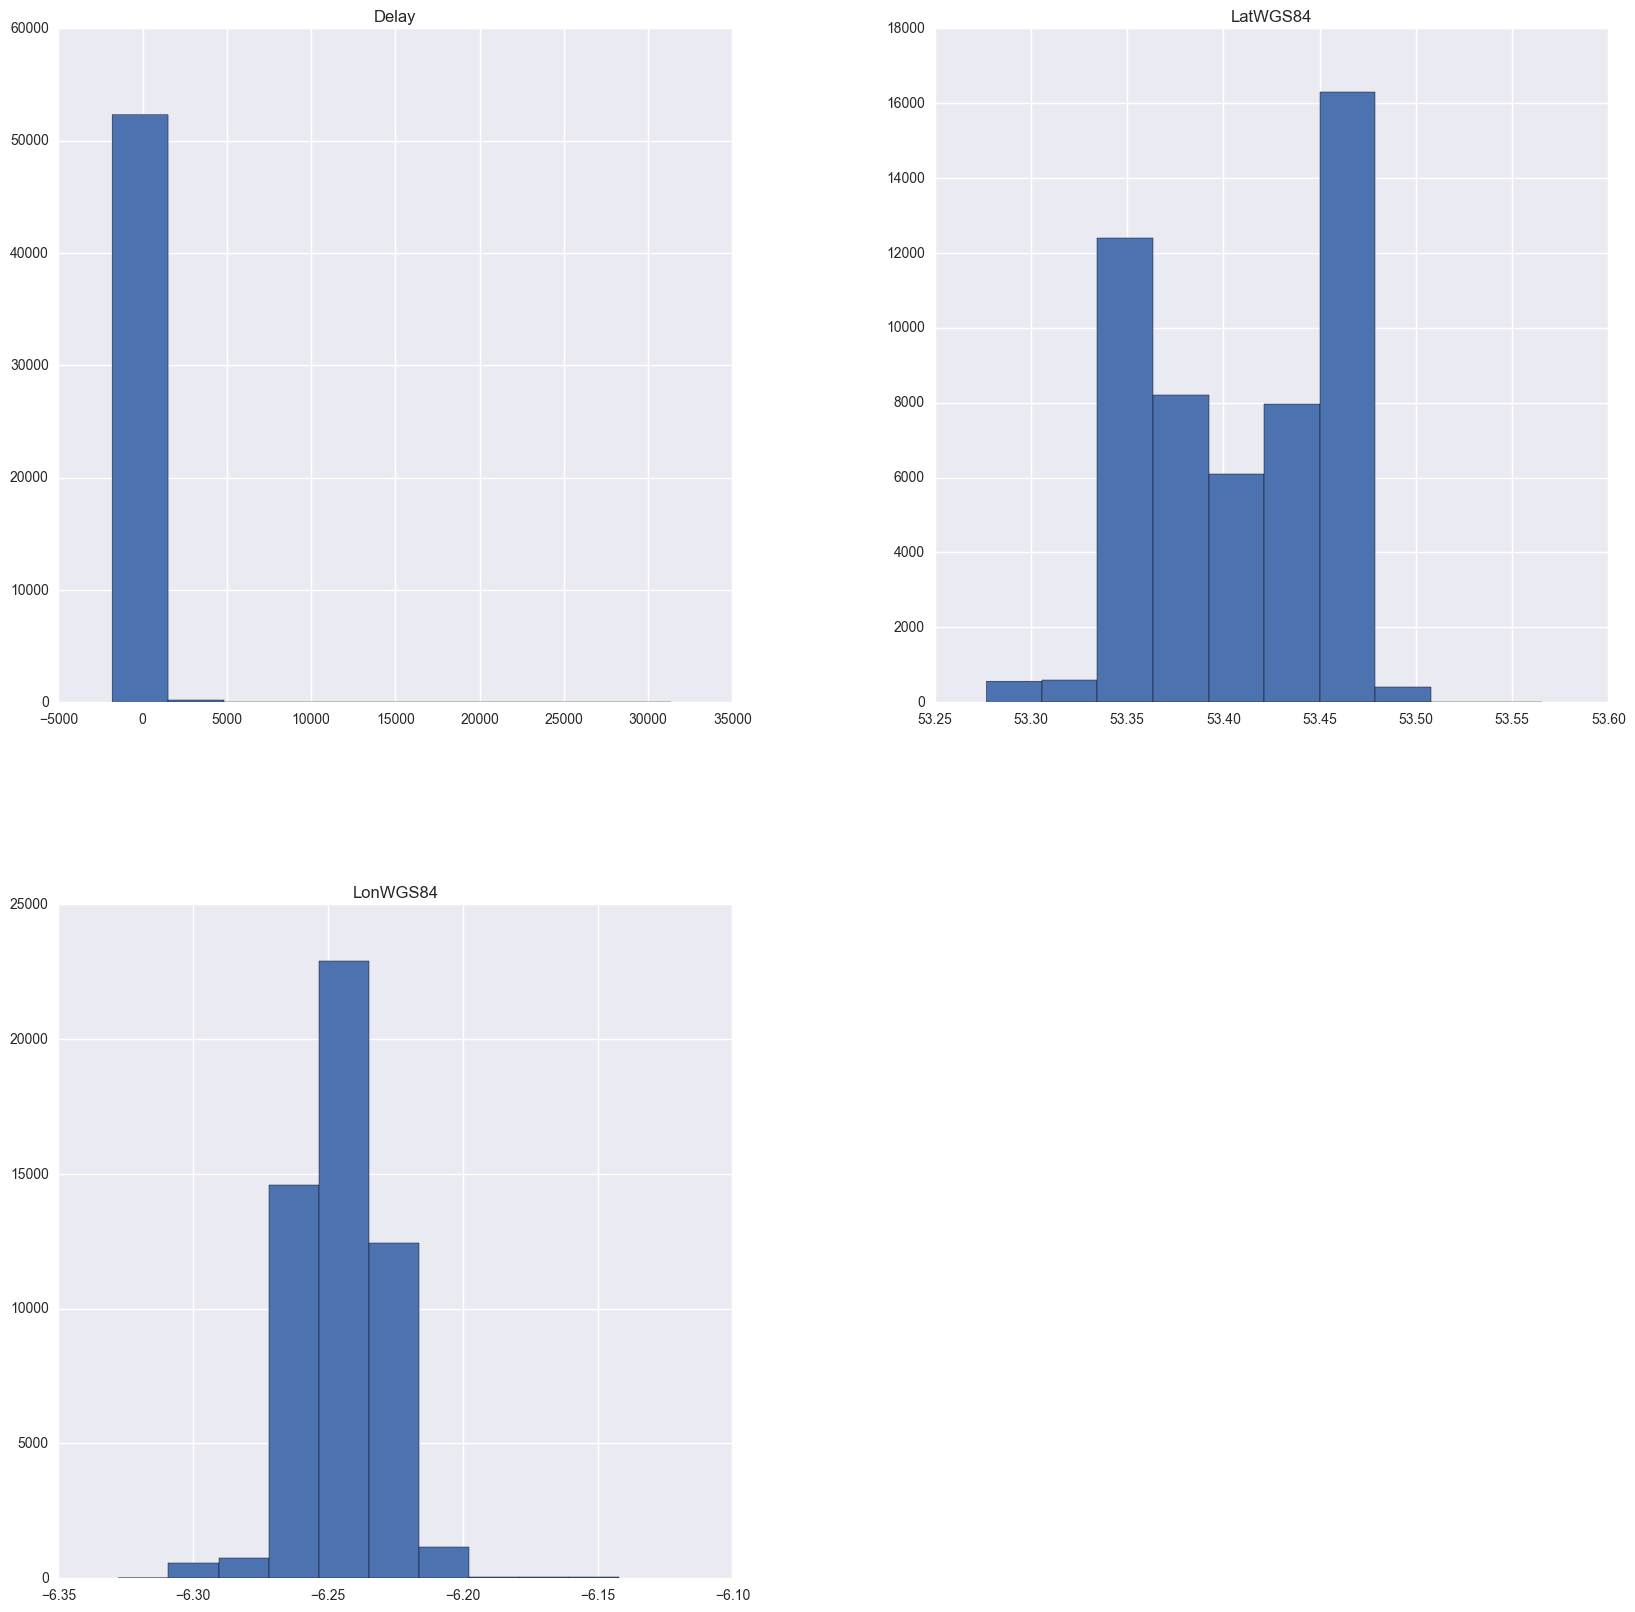

In [12]:
plt.figure()
df.hist(figsize=(20, 20))

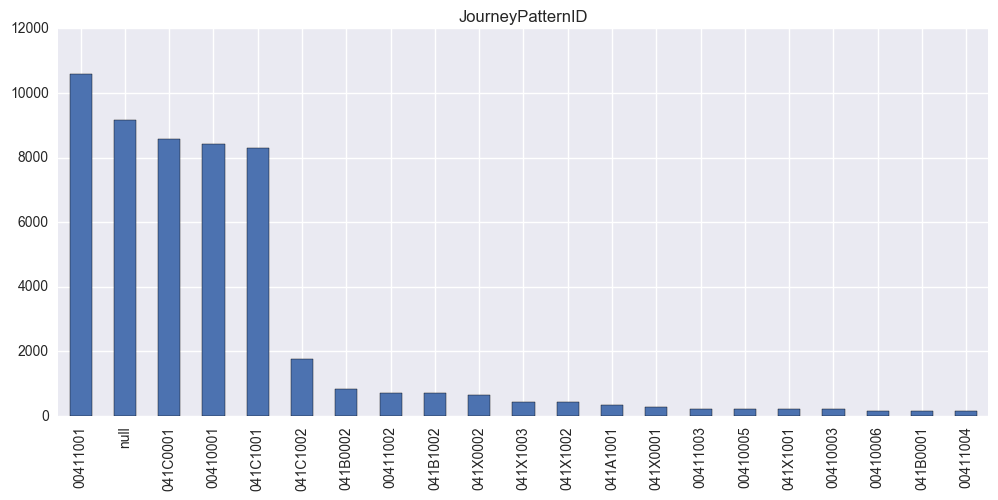

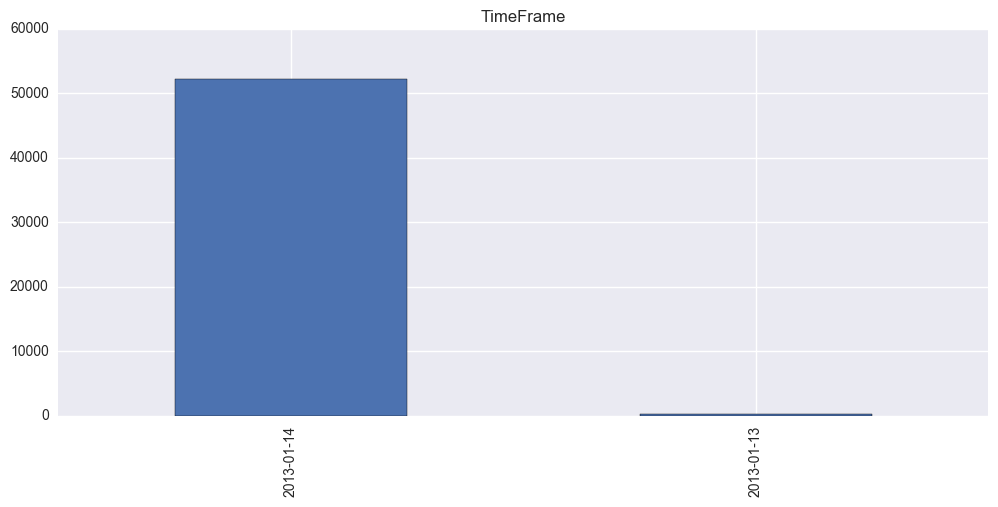

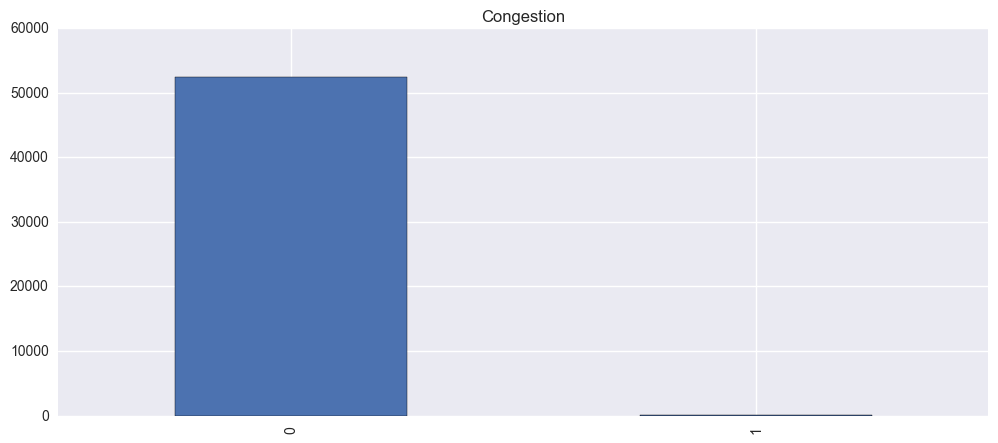

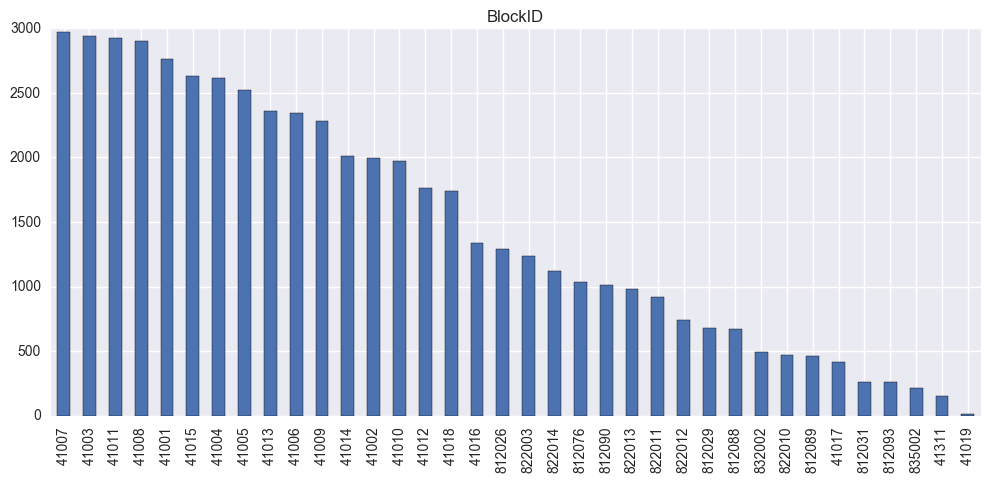

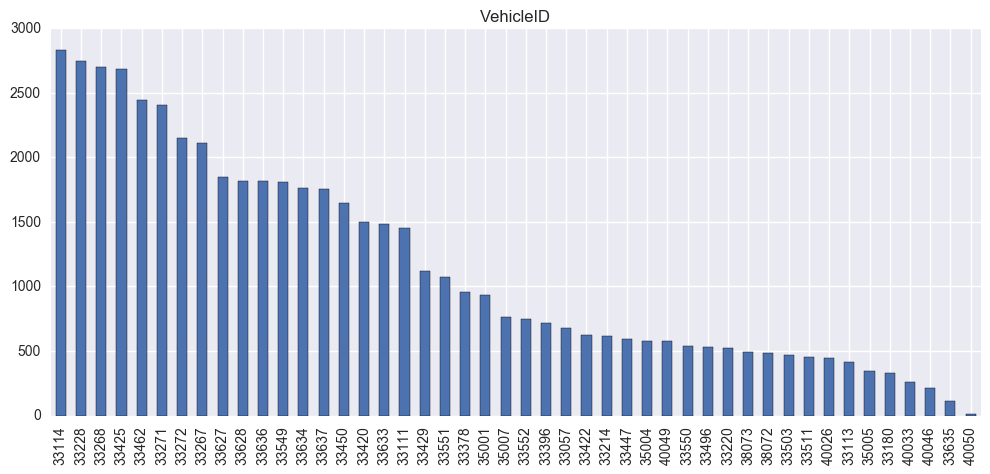

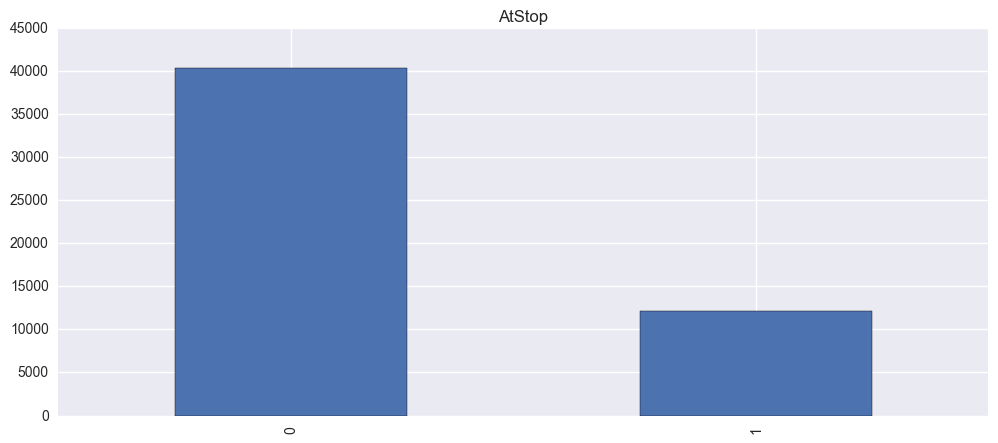

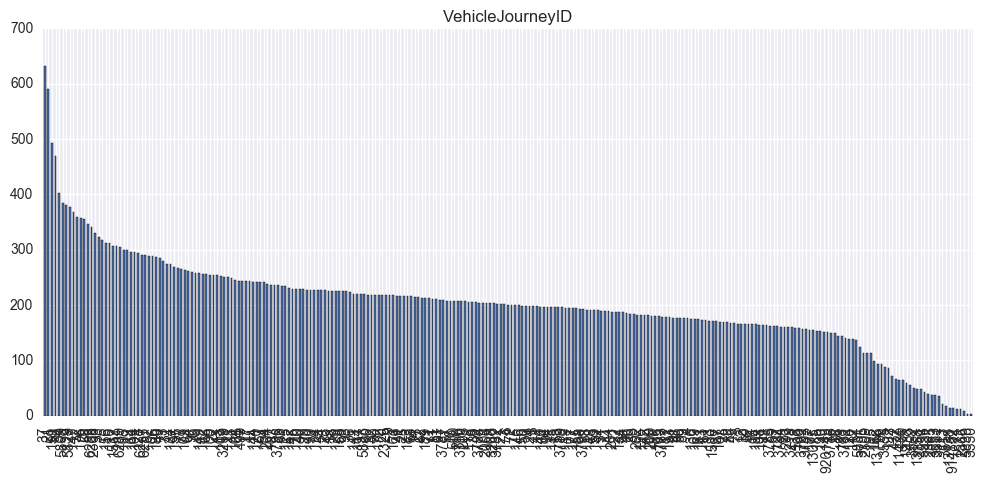

In [13]:
#show the bar plots for all categorical features
categorical_columns = df[['JourneyPatternID','TimeFrame','Congestion','BlockID','VehicleID','AtStop','VehicleJourneyID']].columns
pp = PdfPages('categorical_bar_plots.pdf')
for column in categorical_columns:
    f = df[column].value_counts().plot(kind='bar', title=column, figsize=(12,5))
    pp.savefig(f.get_figure())
    plt.show()
pp.close()

 # Data Understanding: data quality plan

## Irregular cardinality

In [14]:
# Check for irregular cardinality in categorical features.
df.select_dtypes(['category']).columns
print("Unique values for:\n- JourneyPatternID:", pd.unique(df.JourneyPatternID.ravel()))
print("\n- TimeFrame:", sorted(pd.unique(df.TimeFrame.ravel())))
print("\n- VehicleJourneyID:", sorted(pd.unique(df.VehicleJourneyID.ravel())))
print("\n- Congestion:", pd.unique(df.Congestion.ravel()))
print("\n- BlockID:", pd.unique(df.BlockID.ravel()))
print("\n- VehicleID:", pd.unique(df.VehicleID.ravel()))
print("\n- StopID:", pd.unique(df.StopID.ravel()))
print("\n- AtStop:", pd.unique(df.AtStop.ravel()))

Unique values for:
- JourneyPatternID: ['041C1001' '00411001' '041C0001' '041B0002' 'null' '00410001' '041C1002'
 '041B0001' '041A1001' '00411002' '041X1003' '00410005' '041B1002'
 '041X1002' '00410003' '041X1001' '00410006' '00411004' '041X0002'
 '00411003' '041X0001']

- TimeFrame: ['2013-01-13', '2013-01-14']

- VehicleJourneyID: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 1

In [15]:
df.isnull().sum()

DateTime            0
JourneyPatternID    0
TimeFrame           0
VehicleJourneyID    0
Congestion          0
LonWGS84            0
LatWGS84            0
Delay               0
BlockID             0
VehicleID           0
StopID              0
AtStop              0
dtype: int64

## Outlier

# Exploring relationship between feature pairs

##  plots between continous and categorical features with  target feature

### Dealy with DateTime

In [16]:
df[['Delay','LonWGS84','LatWGS84']].corr()

,Delay,LonWGS84,LatWGS84
Delay,1.000000,-0.037067,-0.112720
LonWGS84,-0.037067,1.000000,0.360667
LatWGS84,-0.112720,0.360667,1.000000


According to the above table, it can be seen that longitude and latitude both do not have relationship with delay.

In [17]:

aggregations = {
    'Delay':"sum"
}
group = df.groupby(df['DateTime'])['Delay'].agg(aggregations)
group

,Delay
DateTime,
2013-01-14 00:00:01,-377
2013-01-14 00:00:03,-216
2013-01-14 00:00:13,-48
2013-01-14 00:00:16,-684
2013-01-14 00:00:22,-408
2013-01-14 00:00:24,-216
2013-01-14 00:00:34,-732
2013-01-14 00:00:42,-408
2013-01-14 00:00:44,-198


In [18]:
#df.groupby([df['DateTime'],pd.TimeGrouper(freq='30Min')])

In [19]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format="%Y-%m-%d %H:%M:%S")
df1 = df.set_index("DateTime")
df1.resample("60Min").mean().to_csv('2.csv')
clean_df = pd.read_csv('2.csv')
clean_df.head()

,DateTime,LonWGS84,LatWGS84,Delay
0,2013-01-14 00:00:00,-6.247032,53.38429,-386.946667
1,2013-01-14 01:00:00,NaN,NaN,NaN
2,2013-01-14 02:00:00,NaN,NaN,NaN
3,2013-01-14 03:00:00,NaN,NaN,NaN
4,2013-01-14 04:00:00,NaN,NaN,NaN


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]), <a list of 24 Text xticklabel objects>)

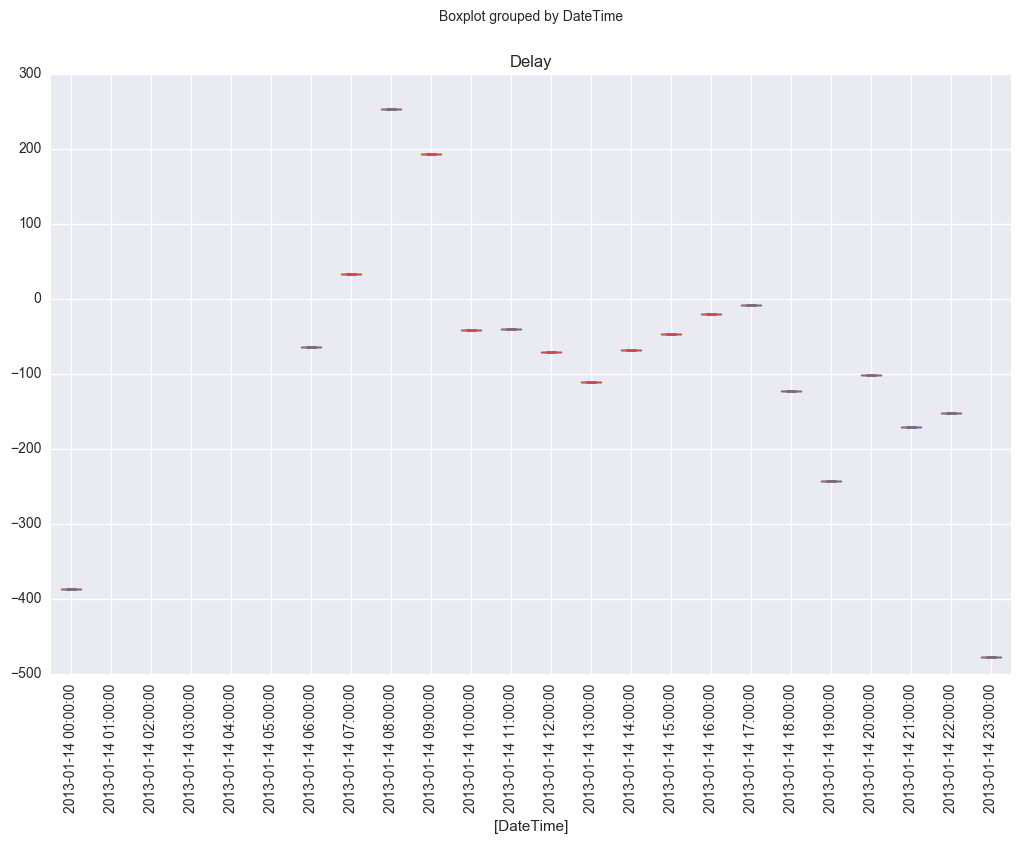

In [20]:
plt.figure()

flierprops = dict(marker='o', markerfacecolor='green', markersize=6, 
                  linestyle='none')
bp = clean_df.boxplot(column=['Delay'], by=['DateTime'],flierprops=flierprops,figsize=(12,8))
pl.xticks(rotation = 90)

In [21]:
g = df.groupby(['JourneyPatternID'])
g['VehicleID'].unique()

JourneyPatternID
00410001    [33422, 33272, 35007, 33462, 33267, ..., 33633...
00410003               [33228]
Categories (1, int64): [33228]
00410005               [33422]
Categories (1, int64): [33422]
00410006               [33268]
Categories (1, int64): [33268]
00411001    [40050, 33637, 33420, 33422, 33267, ..., 33057...
00411002    [33272, 35007, 33636, 33637]
Categories (4, in...
00411003               [40026]
Categories (1, int64): [40026]
00411004               [33511]
Categories (1, int64): [33511]
041A1001    [33268, 33425]
Categories (2, int64): [33268, ...
041B0001               [33271]
Categories (1, int64): [33271]
041B0002    [33228, 33271, 33113, 33633, 33450]
Categories...
041B1002    [33271, 33113, 33633]
Categories (3, int64): [...
041C0001    [33635, 33425, 33637, 33420, 33111, ..., 33634...
041C1001    [40049, 33503, 33228, 33111, 33634, ..., 33268...
041C1002    [33462, 40046, 33111, 33378, 33628, 33214, 331...
041X0001               [35001]
Categories (1, int64):

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 46 Text xticklabel objects>)

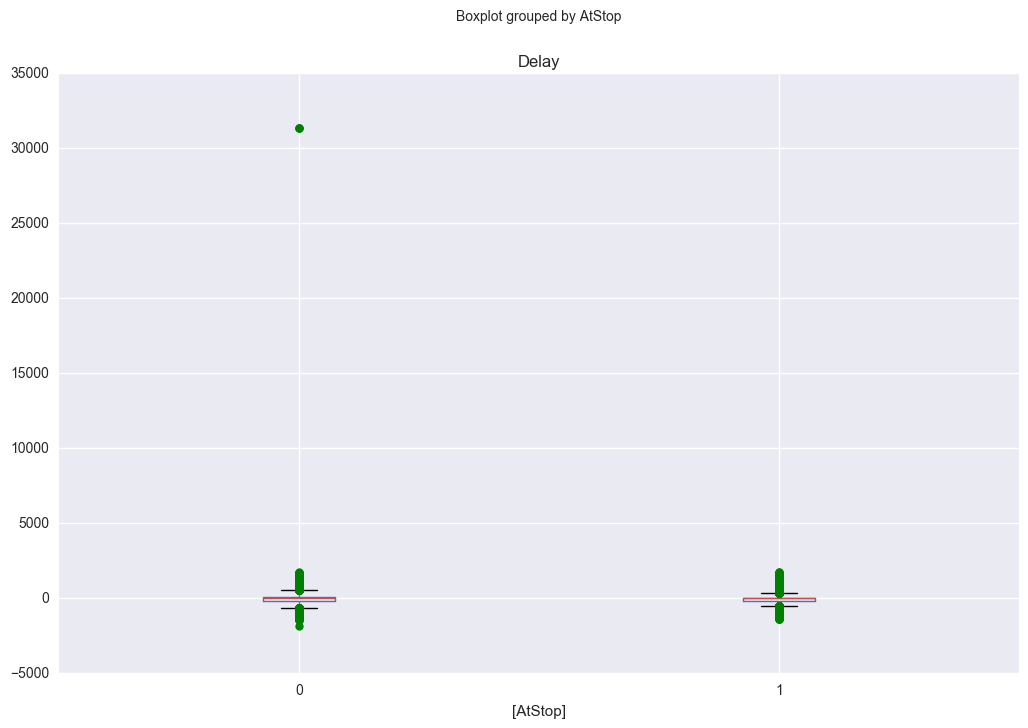

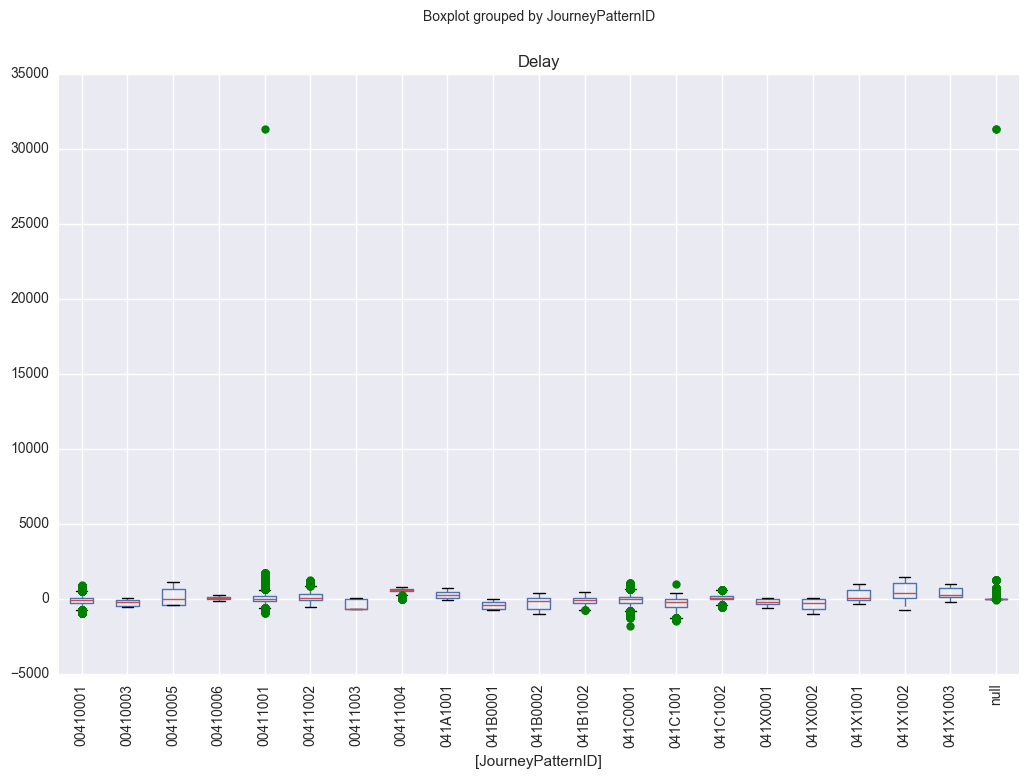

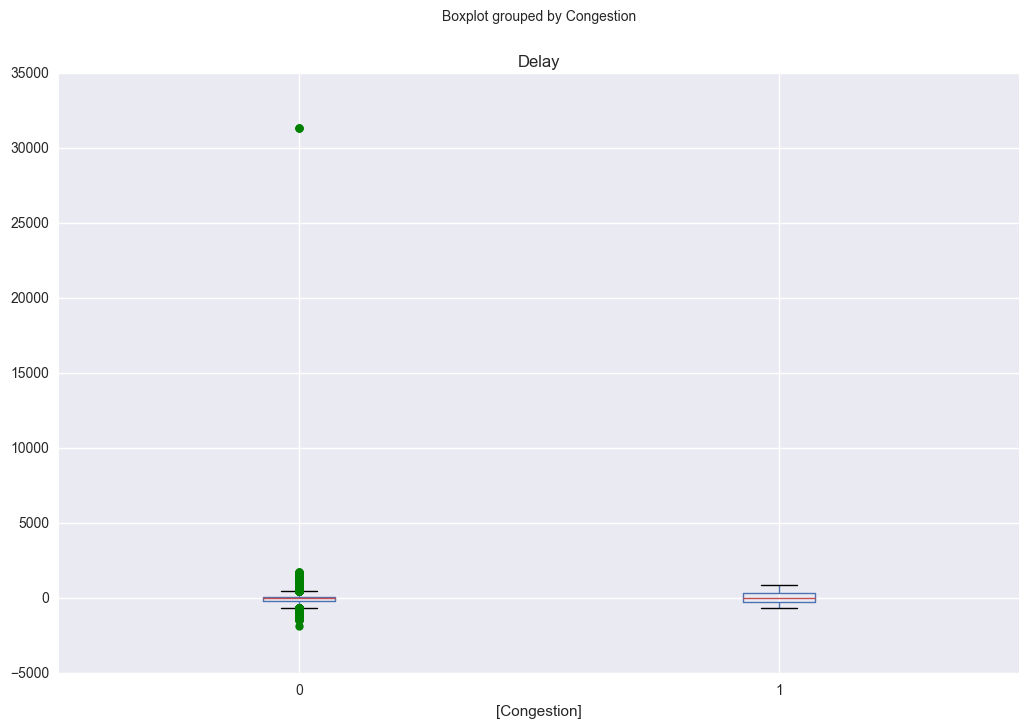

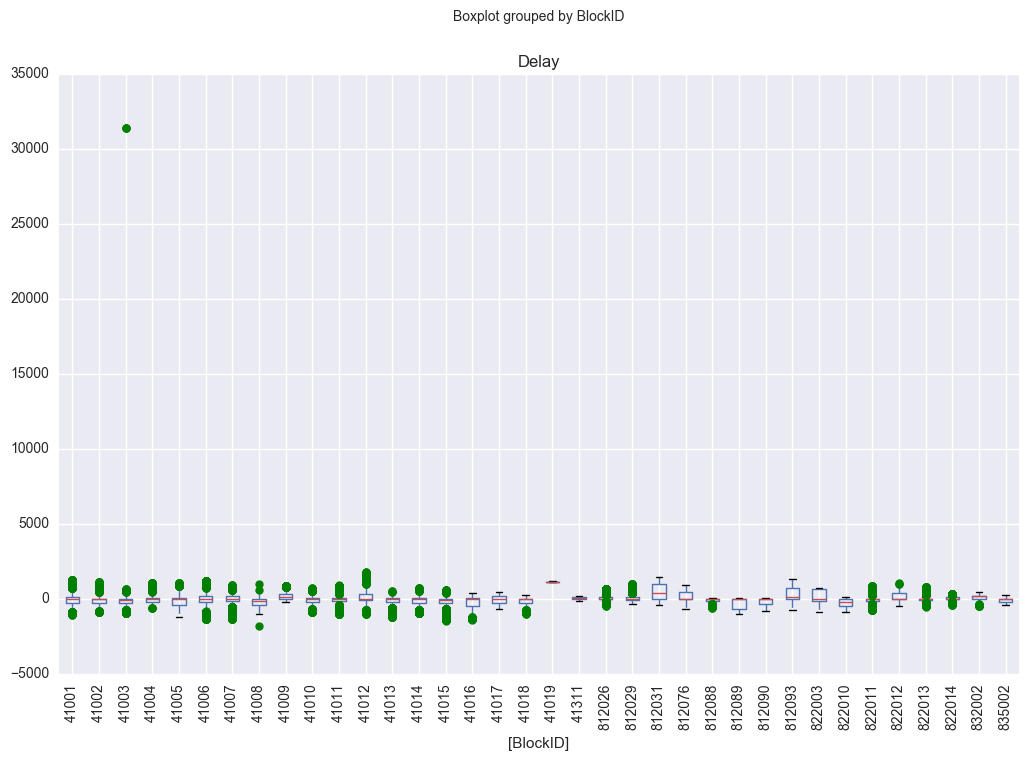

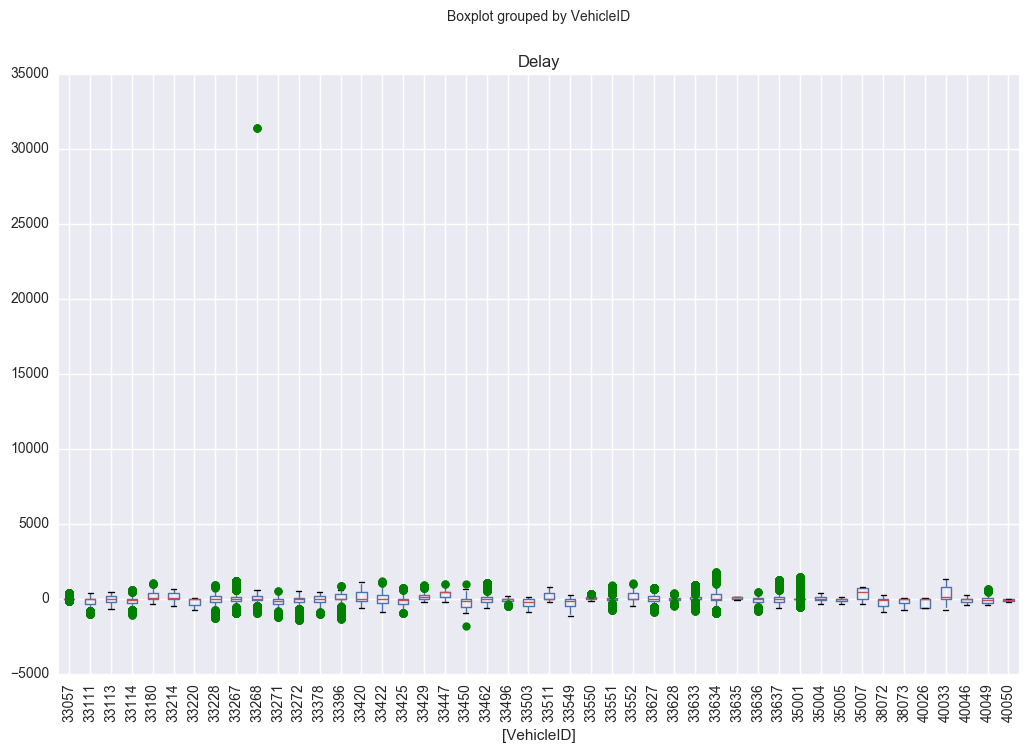

In [22]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
bp = df.boxplot(column=['Delay'], by=['AtStop'], flierprops=flierprops, figsize=(12,8))
bp = df.boxplot(column=['Delay'], by=['JourneyPatternID'], flierprops=flierprops, figsize=(12,8))
pl.xticks(rotation = 90)
bp = df.boxplot(column=['Delay'], by=['Congestion'], flierprops=flierprops, figsize=(12,8))
bp = df.boxplot(column=['Delay'], by=['BlockID'], flierprops=flierprops, figsize=(12,8))
pl.xticks(rotation = 90)
bp = df.boxplot(column=['Delay'], by=['VehicleID'], flierprops=flierprops, figsize=(12,8))
pl.xticks(rotation = 90)

In [23]:
# find the 5 higest listingprice
df.sort_values(by='Delay', axis=0, ascending=False, inplace=False,kind='quicksort',na_position='last').head(5)

,DateTime,JourneyPatternID,TimeFrame,VehicleJourneyID,Congestion,LonWGS84,LatWGS84,Delay,BlockID,VehicleID,StopID,AtStop
47987,2013-01-14 20:38:04,null,2013-01-14,3553,0,-6.255767,53.349083,31362,41003,33268,4957,0
47979,2013-01-14 20:37:46,00411001,2013-01-14,3553,0,-6.255717,53.349133,31362,41003,33268,4957,0
48004,2013-01-14 20:38:43,null,2013-01-14,3553,0,-6.255784,53.349083,31362,41003,33268,4957,0
8747,2013-01-14 08:27:25,00411001,2013-01-14,98,0,-6.260511,53.350815,1762,41012,33634,277,1
8773,2013-01-14 08:27:46,00411001,2013-01-14,98,0,-6.260450,53.350674,1762,41012,33634,277,0


### According to the above graphs and the table, there are some outliers that are the same data. we can delete those data from original data.

In [24]:
#delete the outliers rows 
import csv

inpu = open('13011441.csv', 'r')
output = open('011441.csv', 'w')
writer = csv.writer(output)
for row in csv.reader(inpu):
    if row[1]!="null":
        writer.writerow(row)
inpu.close()
output.close()

In [87]:
df = pd.read_csv('011441.csv')
df

,DateTime,JourneyPatternID,TimeFrame,VehicleJourneyID,Congestion,LonWGS84,LatWGS84,Delay,BlockID,VehicleID,StopID,AtStop
0,2013-01-14 00:00:01,041C1001,2013-01-13,13146,0,-6.263903,53.354855,-377,41005,40049,52,0
1,2013-01-14 00:00:03,00411001,2013-01-13,13138,0,-6.258044,53.348648,-216,41009,40050,277,0
2,2013-01-14 00:00:13,041C0001,2013-01-13,13158,0,-6.244040,53.453304,-48,41004,33635,3707,0
3,2013-01-14 00:00:16,041B0002,2013-01-13,13075,0,-6.225200,53.449665,-684,41001,33228,7135,0
4,2013-01-14 00:00:22,041C1001,2013-01-13,13146,0,-6.261737,53.352970,-408,41005,40049,52,0
5,2013-01-14 00:00:24,00411001,2013-01-13,13138,0,-6.256178,53.348953,-216,41009,40050,277,0
6,2013-01-14 00:00:34,041C0001,2013-01-13,13158,0,-6.241844,53.453827,-48,41004,33635,3707,0
7,2013-01-14 00:00:34,041B0002,2013-01-13,13075,0,-6.227483,53.448200,-684,41001,33228,7135,0
8,2013-01-14 00:00:42,041C1001,2013-01-13,13146,0,-6.261227,53.352467,-408,41005,40049,52,0
9,2013-01-14 00:00:44,00411001,2013-01-13,13138,0,-6.255611,53.349049,-198,41009,40050,277,0


# Data Preparation

## Normalization

In [88]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format="%Y-%m-%d %H:%M:%S")
df['new_date'] = [d.date() for d in df['DateTime']]
df['new_time'] = [d.time() for d in df['DateTime']]
df

,DateTime,JourneyPatternID,TimeFrame,VehicleJourneyID,Congestion,LonWGS84,LatWGS84,Delay,BlockID,VehicleID,StopID,AtStop,new_date,new_time
0,2013-01-14 00:00:01,041C1001,2013-01-13,13146,0,-6.263903,53.354855,-377,41005,40049,52,0,2013-01-14,00:00:01
1,2013-01-14 00:00:03,00411001,2013-01-13,13138,0,-6.258044,53.348648,-216,41009,40050,277,0,2013-01-14,00:00:03
2,2013-01-14 00:00:13,041C0001,2013-01-13,13158,0,-6.244040,53.453304,-48,41004,33635,3707,0,2013-01-14,00:00:13
3,2013-01-14 00:00:16,041B0002,2013-01-13,13075,0,-6.225200,53.449665,-684,41001,33228,7135,0,2013-01-14,00:00:16
4,2013-01-14 00:00:22,041C1001,2013-01-13,13146,0,-6.261737,53.352970,-408,41005,40049,52,0,2013-01-14,00:00:22
5,2013-01-14 00:00:24,00411001,2013-01-13,13138,0,-6.256178,53.348953,-216,41009,40050,277,0,2013-01-14,00:00:24
6,2013-01-14 00:00:34,041C0001,2013-01-13,13158,0,-6.241844,53.453827,-48,41004,33635,3707,0,2013-01-14,00:00:34
7,2013-01-14 00:00:34,041B0002,2013-01-13,13075,0,-6.227483,53.448200,-684,41001,33228,7135,0,2013-01-14,00:00:34
8,2013-01-14 00:00:42,041C1001,2013-01-13,13146,0,-6.261227,53.352467,-408,41005,40049,52,0,2013-01-14,00:00:42
9,2013-01-14 00:00:44,00411001,2013-01-13,13138,0,-6.255611,53.349049,-198,41009,40050,277,0,2013-01-14,00:00:44


In [89]:
#df.groupby(['JourneyPatternID']).groups

In [90]:
d = df['JourneyPatternID']
new =[]
for i in d:
    new.append(i[4])
a = pd.DataFrame({'JourneyID': new})
a.head()

,JourneyID
0,1
1,1
2,0
3,0
4,1


In [91]:
time = df['new_time']
ne =[]
for i in time:
    h=i.hour
    ne.append(h)
t = pd.DataFrame({'time': ne})
t.head()

,time
0,0
1,0
2,0
3,0
4,0


In [106]:
df_dt = pd.concat([t.time,a.JourneyID,df.JourneyPatternID, df.TimeFrame,df.VehicleJourneyID,
                     df.Congestion,df.LonWGS84,df.LatWGS84,df.Delay,df.BlockID,
                     df.VehicleID,df.StopID,df.AtStop,df.new_time],axis=1)
df_dt

,time,JourneyID,JourneyPatternID,TimeFrame,VehicleJourneyID,Congestion,LonWGS84,LatWGS84,Delay,BlockID,VehicleID,StopID,AtStop,new_time
0,0,1,041C1001,2013-01-13,13146,0,-6.263903,53.354855,-377,41005,40049,52,0,00:00:01
1,0,1,00411001,2013-01-13,13138,0,-6.258044,53.348648,-216,41009,40050,277,0,00:00:03
2,0,0,041C0001,2013-01-13,13158,0,-6.244040,53.453304,-48,41004,33635,3707,0,00:00:13
3,0,0,041B0002,2013-01-13,13075,0,-6.225200,53.449665,-684,41001,33228,7135,0,00:00:16
4,0,1,041C1001,2013-01-13,13146,0,-6.261737,53.352970,-408,41005,40049,52,0,00:00:22
5,0,1,00411001,2013-01-13,13138,0,-6.256178,53.348953,-216,41009,40050,277,0,00:00:24
6,0,0,041C0001,2013-01-13,13158,0,-6.241844,53.453827,-48,41004,33635,3707,0,00:00:34
7,0,0,041B0002,2013-01-13,13075,0,-6.227483,53.448200,-684,41001,33228,7135,0,00:00:34
8,0,1,041C1001,2013-01-13,13146,0,-6.261227,53.352467,-408,41005,40049,52,0,00:00:42
9,0,1,00411001,2013-01-13,13138,0,-6.255611,53.349049,-198,41009,40050,277,0,00:00:44


In [97]:
df_dt[['Delay','LonWGS84','LatWGS84','time','VehicleJourneyID','Congestion','BlockID','VehicleID','StopID','AtStop']].corr()

,Delay,LonWGS84,LatWGS84,time,VehicleJourneyID,Congestion,BlockID,VehicleID,StopID,AtStop
Delay,1.000000,-0.059491,-0.125330,-0.236711,0.030110,0.015264,0.051487,-0.012670,-0.125273,0.058166
LonWGS84,-0.059491,1.000000,0.578515,-0.014943,-0.001270,-0.060784,-0.012367,0.013890,0.459823,-0.212767
LatWGS84,-0.125330,0.578515,1.000000,0.050531,-0.001580,-0.049380,-0.083062,-0.052536,0.756245,-0.054142
time,-0.236711,-0.014943,0.050531,1.000000,-0.073632,0.000943,-0.132917,-0.121384,0.007342,0.040421
VehicleJourneyID,0.030110,-0.001270,-0.001580,-0.073632,1.000000,-0.003997,-0.020805,-0.002584,-0.005574,-0.028178
Congestion,0.015264,-0.060784,-0.049380,0.000943,-0.003997,1.000000,0.009350,-0.013747,-0.033698,-0.034119
BlockID,0.051487,-0.012367,-0.083062,-0.132917,-0.020805,0.009350,1.000000,0.341580,0.019118,0.000636
VehicleID,-0.012670,0.013890,-0.052536,-0.121384,-0.002584,-0.013747,0.341580,1.000000,0.011061,-0.013169
StopID,-0.125273,0.459823,0.756245,0.007342,-0.005574,-0.033698,0.019118,0.011061,1.000000,-0.048160
AtStop,0.058166,-0.212767,-0.054142,0.040421,-0.028178,-0.034119,0.000636,-0.013169,-0.048160,1.000000


In [107]:
# Train aka fit, a model using all continuous features.
lm = sm.ols(formula="Delay ~  JourneyPatternID + time + Congestion + AtStop + StopID + BlockID", data=df_dt).fit()

# Print the weights learned for each feature.
print(lm.params)

Intercept                       139.947584
JourneyPatternID[T.00410003]   -249.717859
JourneyPatternID[T.00410005]    130.089904
JourneyPatternID[T.00410006]     66.363464
JourneyPatternID[T.00411001]    166.523818
JourneyPatternID[T.00411002]    141.651599
JourneyPatternID[T.00411003]   -228.175789
JourneyPatternID[T.00411004]    646.248535
JourneyPatternID[T.041A1001]    270.983895
JourneyPatternID[T.041B0001]   -414.991895
JourneyPatternID[T.041B0002]   -141.849606
JourneyPatternID[T.041B1002]     -8.552028
JourneyPatternID[T.041C0001]     19.726494
JourneyPatternID[T.041C1001]   -177.382163
JourneyPatternID[T.041C1002]     94.013862
JourneyPatternID[T.041X0001]    -20.834351
JourneyPatternID[T.041X0002]   -180.367273
JourneyPatternID[T.041X1001]    339.076577
JourneyPatternID[T.041X1002]    556.104710
JourneyPatternID[T.041X1003]    473.504754
time                            -12.779333
Congestion                      170.353221
AtStop                           60.394199
StopID     

According to the p-value that less then 0.05, all the features are less than 0.05. Therefore, it cannot be deleted the features. However, R-square is not high. 

# Training model

In [109]:
df_Descriptive_Features=df_dt[df_dt[['JourneyPatternID','time','Congestion','AtStop','StopID','BlockID']].columns]
lm.predict(df_Descriptive_Features)

array([ -40.87381538,  297.81616662,   71.50742969, ..., -279.87515055,
          9.10680705, -327.47060822])

In [110]:
#show the predict result and actual result
df_predict=pd.DataFrame({'Actual':df_dt.Delay, 'Predict':lm.predict(df_Descriptive_Features)})
df_predict.head(10)

,Actual,Predict
0,-377,-40.873815
1,-216,297.816167
2,-48,71.507430
3,-684,-169.533830
4,-408,-40.873815
5,-216,297.816167
6,-48,71.507430
7,-684,-169.533830
8,-408,-40.873815
9,-198,297.816167


In [111]:
# Print the Mean Squared Error of the model on the training set
mse = ((df_dt.Delay - lm.predict(df_Descriptive_Features))** 2).mean()
print("\nMean Squared Error:\n", mse)


Mean Squared Error:
 111460.25809665033


In [112]:
# Print the Mean Absolute Error of the model on the training set
mae = abs(df_dt.Delay - lm.predict(df_Descriptive_Features)).mean()
print("\nMean Absolute Error:\n", mae)


Mean Absolute Error:
 251.8447246581092


In [113]:
#Only feature (p-value is smaller than 0.05, p-value=0) is to be statistically significant.
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Delay   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     522.3
Date:                Thu, 06 Jul 2017   Prob (F-statistic):               0.00
Time:                        18:32:32   Log-Likelihood:            -3.1356e+05
No. Observations:               43371   AIC:                         6.272e+05
Df Residuals:                   43346   BIC:                         6.274e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Intercept       

In [146]:
df_A = (df.JourneyPatternID=='00410003') * 1.0
df_B = (df.JourneyPatternID=='00410005') * 1.0
df_C = (df.JourneyPatternID=='00411001') * 1.0
df_D = (df.JourneyPatternID=='00411002') * 1.0
df_E = (df.JourneyPatternID=='00411003') * 1.0
df_F = (df.JourneyPatternID=='00410006') * 1.0
df_G = (df.JourneyPatternID=='00411004') * 1.0
df_H = (df.JourneyPatternID=='041A1001') * 1.0
df_I = (df.JourneyPatternID=='041B0001') * 1.0
df_J = (df.JourneyPatternID=='041B0002') * 1.0
df_K = (df.JourneyPatternID=='041B1002') * 1.0
df_L = (df.JourneyPatternID=='041C0001') * 1.0
df_M = (df.JourneyPatternID=='041C1001') * 1.0
df_N = (df.JourneyPatternID=='041C1002') * 1.0
df_O = (df.JourneyPatternID=='041X0001') * 1.0
df_P = (df.JourneyPatternID=='041X0002') * 1.0
df_Q = (df.JourneyPatternID=='041X1001') * 1.0
df_R = (df.JourneyPatternID=='041X1002') * 1.0
df_S = (df.JourneyPatternID=='041X1003') * 1.0
df_ER = pd.DataFrame({'Journey_A': df_A,
                     'Journey_B': df_B,
                     'Journey_C':df_C,
                     'Journey_D': df_D,
                     'Journey_E': df_E,
                     'Journey_F':df_F,
                     'Journey_G': df_G,
                     'Journey_H': df_H,
                     'Journey_I':df_I,
                     'Journey_J': df_J,
                     'Journey_K': df_K,
                     'Journey_L': df_L,
                     'Journey_M':df_M,
                     'Journey_N': df_N,
                     'Journey_O': df_O,
                     'Journey_P':df_P,
                     'Journey_Q': df_Q,
                     'Journey_R': df_R,
                     'Journey_S':df_S,
                     })
df_ER.head()

,Journey_A,Journey_B,Journey_C,Journey_D,Journey_E,Journey_F,Journey_G,Journey_H,Journey_I,Journey_J,Journey_K,Journey_L,Journey_M,Journey_N,Journey_O,Journey_P,Journey_Q,Journey_R,Journey_S
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
df_new = pd.concat([df_dt, df_ER], axis = 1)
df_new.head()

,time,JourneyID,JourneyPatternID,TimeFrame,VehicleJourneyID,Congestion,LonWGS84,LatWGS84,Delay,BlockID,...,Journey_J,Journey_K,Journey_L,Journey_M,Journey_N,Journey_O,Journey_P,Journey_Q,Journey_R,Journey_S
0,0,1,041C1001,2013-01-13,13146,0,-6.263903,53.354855,-377,41005,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,00411001,2013-01-13,13138,0,-6.258044,53.348648,-216,41009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,041C0001,2013-01-13,13158,0,-6.244040,53.453304,-48,41004,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,041B0002,2013-01-13,13075,0,-6.225200,53.449665,-684,41001,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,041C1001,2013-01-13,13146,0,-6.261737,53.352970,-408,41005,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
# Train aka fit, a model using all continuous features.
lm = sm.ols(formula="Delay ~  Journey_A + time + Congestion + AtStop + StopID + BlockID + Journey_B+ Journey_C + Journey_D + Journey_E + Journey_F +Journey_G+ Journey_H +Journey_I +Journey_J + Journey_L + Journey_M +Journey_N + Journey_P +Journey_Q + Journey_R + Journey_S", data=df_new).fit()

# Print the weights learned for each feature.
print(lm.params)

Intercept     139.252727
Journey_A    -248.730901
time          -12.802840
Congestion    170.459249
AtStop         60.398529
StopID         -0.023202
BlockID        -0.000056
Journey_B     131.060602
Journey_C     167.775816
Journey_D     142.836152
Journey_E    -226.049826
Journey_F      67.335716
Journey_G     648.224926
Journey_H     271.946558
Journey_I    -414.034735
Journey_J    -140.713670
Journey_L      20.912865
Journey_M    -176.150313
Journey_N      95.414678
Journey_P    -178.260863
Journey_Q     340.978036
Journey_R     558.000547
Journey_S     475.415002
dtype: float64


In [149]:
df_NewDescriptive_Features=df_new[df_new[['Journey_A','time','Congestion','AtStop','StopID','BlockID','Journey_B','Journey_C','Journey_D','Journey_E',
                                    'Journey_F','Journey_G','Journey_H','Journey_I','Journey_J','Journey_P','Journey_L','Journey_M','Journey_N','Journey_Q','Journey_R','Journey_S']].columns]
lm.predict(df_NewDescriptive_Features)

array([ -40.38540823,  298.32014544,   71.87609973, ..., -279.92787178,
          9.07468552, -327.69210171])

In [150]:
# Show the table
df_Predict2=pd.DataFrame({'Actual':df_new.Delay,'Predict':lm.predict(df_NewDescriptive_Features)})
df_Predict2.head()

,Actual,Predict
0,-377,-40.385408
1,-216,298.320145
2,-48,71.876100
3,-684,-169.285238
4,-408,-40.385408


In [176]:
PredictClass=(lm.predict(df_NewDescriptive_Features)>0.5)*1.0
#Show the line
df_PredictClass=pd.DataFrame(PredictClass,columns=['PredictClass'])
df_PredictClass

,PredictClass
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0
5,1.0
6,1.0
7,0.0
8,0.0
9,1.0


In [177]:
# Print the Mean Squared Error of the model on the training set
mse = ((df_new.Delay - lm.predict(df_NewDescriptive_Features))** 2).mean()
print("\nMean Squared Error:\n", mse)


Mean Squared Error:
 111463.90279166885


In [178]:
# Print the Mean Absolute Error of the model on the training set
mae = abs(df_new.Delay - lm.predict(df_NewDescriptive_Features)).mean()
print("\nMean Absolute Error:\n", mae)


Mean Absolute Error:
 251.83778888915356


In [179]:
# Crate a new dataframe where we add column PredictClass to the subset dataframe
df_subset_liner_All=pd.concat([df_NewDescriptive_Features,df[df[['Delay']].columns]],axis=1)

df_subsetPredict=pd.concat([df_subset_liner_All,df_Predict2.Predict],axis=1)
df_subsetPredict.head()

,Journey_A,time,Congestion,AtStop,StopID,BlockID,Journey_B,Journey_C,Journey_D,Journey_E,...,Journey_J,Journey_P,Journey_L,Journey_M,Journey_N,Journey_Q,Journey_R,Journey_S,Delay,Predict
0,0.0,0,0,0,52,41005,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-377,-40.385408
1,0.0,0,0,0,277,41009,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-216,298.320145
2,0.0,0,0,0,3707,41004,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-48,71.876100
3,0.0,0,0,0,7135,41001,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-684,-169.285238
4,0.0,0,0,0,52,41005,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-408,-40.385408


In [180]:
df_new.Delay.mean()

-63.72682207004681

In [181]:
# Transform the target feature RentalPrice into a categorical feature named PriceClass. 
# Map the prices higher than the average RentalPrice to category High, remaining prices to category Low.
DelayClass = (df_new.Delay > -63.72682207004681) * 1.0

df_DelayClass = pd.DataFrame({'DelayClass': DelayClass})
df_DelayClass

,DelayClass
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
5,0.0
6,1.0
7,0.0
8,0.0
9,0.0


In [185]:
# Crate a new dataframe where we add column PriceClass to the original dataframe with 10 offices.
df_classif = pd.concat([df_new, df_DelayClass , df_PredictClass.PredictClass], axis = 1)
df_classif

,time,JourneyID,JourneyPatternID,TimeFrame,VehicleJourneyID,Congestion,LonWGS84,LatWGS84,Delay,BlockID,...,Journey_L,Journey_M,Journey_N,Journey_O,Journey_P,Journey_Q,Journey_R,Journey_S,DelayClass,PredictClass
0,0,1,041C1001,2013-01-13,13146,0,-6.263903,53.354855,-377,41005,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,00411001,2013-01-13,13138,0,-6.258044,53.348648,-216,41009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0,041C0001,2013-01-13,13158,0,-6.244040,53.453304,-48,41004,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0,0,041B0002,2013-01-13,13075,0,-6.225200,53.449665,-684,41001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,041C1001,2013-01-13,13146,0,-6.261737,53.352970,-408,41005,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,1,00411001,2013-01-13,13138,0,-6.256178,53.348953,-216,41009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0,0,041C0001,2013-01-13,13158,0,-6.241844,53.453827,-48,41004,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,0,0,041B0002,2013-01-13,13075,0,-6.227483,53.448200,-684,41001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,1,041C1001,2013-01-13,13146,0,-6.261227,53.352467,-408,41005,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,1,00411001,2013-01-13,13138,0,-6.255611,53.349049,-198,41009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [188]:
# Some more evaluation metrics.
print("Accuracy: ", metrics.accuracy_score(df_classif.DelayClass, df_classif.PredictClass))
print("Confusion matrix: \n", metrics.confusion_matrix(df_classif.DelayClass, df_classif.PredictClass))
print("Classification report:\n ", metrics.classification_report(df_classif.DelayClass, df_classif.PredictClass))

Accuracy:  0.622443568283
Confusion matrix: 
 [[15618  3890]
 [12485 11378]]
Classification report:
               precision    recall  f1-score   support

        0.0       0.56      0.80      0.66     19508
        1.0       0.75      0.48      0.58     23863

avg / total       0.66      0.62      0.62     43371



# Random Forest

In [155]:
#Select the data
X=df_new[df_new[['Journey_A','time','Congestion','AtStop','StopID','BlockID','Journey_B','Journey_C','Journey_D','Journey_E',
                                    'Journey_F','Journey_G','Journey_H','Journey_I','Journey_J','Journey_P','Journey_L','Journey_M','Journey_N','Journey_Q','Journey_R','Journey_S','Journey_K','Journey_O']].columns]
y=df_new[df_new[['Delay']].columns]
# Instantiate estimator, fit with training set
# Train a classification tree
# Train RF with 100 trees
rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfc.fit(X, y)
print(rfc)

/Users/chenzeng/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)


In [ ]:
rfc.predict_proba(X)